<a href="https://colab.research.google.com/github/ppprakharr/CNN-FaceMaskDetection/blob/main/FaceMaskDetection_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing face mask dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:06<00:00, 32.7MB/s]
100% 163M/163M [00:06<00:00, 28.2MB/s]


In [ ]:
#extracting the zip file
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('extracted the zip file')

extracted the zip file


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask/')

In [ ]:
type(with_mask_files)

list

In [ ]:
len(with_mask_files)

3725

In [ ]:
print(with_mask_files[0:5])
print(with_mask_files[5:])

['with_mask_216.jpg', 'with_mask_3153.jpg', 'with_mask_506.jpg', 'with_mask_3254.jpg', 'with_mask_1731.jpg']
['with_mask_3430.jpg', 'with_mask_2098.jpg', 'with_mask_60.jpg', 'with_mask_643.jpg', 'with_mask_3241.jpg', 'with_mask_2796.jpg', 'with_mask_2072.jpg', 'with_mask_3076.jpg', 'with_mask_509.jpg', 'with_mask_1562.jpg', 'with_mask_2684.jpg', 'with_mask_3549.jpg', 'with_mask_1797.jpg', 'with_mask_3514.jpg', 'with_mask_64.jpg', 'with_mask_1050.jpg', 'with_mask_601.jpg', 'with_mask_1693.jpg', 'with_mask_291.jpg', 'with_mask_1841.jpg', 'with_mask_1250.jpg', 'with_mask_2455.jpg', 'with_mask_3.jpg', 'with_mask_1595.jpg', 'with_mask_511.jpg', 'with_mask_417.jpg', 'with_mask_2277.jpg', 'with_mask_2549.jpg', 'with_mask_1896.jpg', 'with_mask_1502.jpg', 'with_mask_287.jpg', 'with_mask_1715.jpg', 'with_mask_465.jpg', 'with_mask_2302.jpg', 'with_mask_1960.jpg', 'with_mask_133.jpg', 'with_mask_385.jpg', 'with_mask_706.jpg', 'with_mask_3489.jpg', 'with_mask_1075.jpg', 'with_mask_1306.jpg', 'with_

In [ ]:
without_mask_files = os.listdir('/content/data/without_mask/')

In [ ]:
len(without_mask_files)

3828

In [ ]:
print(without_mask_files[0:5])
print(without_mask_files[5:])

['without_mask_1059.jpg', 'without_mask_357.jpg', 'without_mask_571.jpg', 'without_mask_3274.jpg', 'without_mask_3322.jpg']
['without_mask_465.jpg', 'without_mask_3501.jpg', 'without_mask_3061.jpg', 'without_mask_2135.jpg', 'without_mask_511.jpg', 'without_mask_3664.jpg', 'without_mask_576.jpg', 'without_mask_979.jpg', 'without_mask_1617.jpg', 'without_mask_1879.jpg', 'without_mask_2272.jpg', 'without_mask_3567.jpg', 'without_mask_312.jpg', 'without_mask_622.jpg', 'without_mask_161.jpg', 'without_mask_3238.jpg', 'without_mask_1639.jpg', 'without_mask_795.jpg', 'without_mask_3143.jpg', 'without_mask_1572.jpg', 'without_mask_3334.jpg', 'without_mask_3797.jpg', 'without_mask_3104.jpg', 'without_mask_1884.jpg', 'without_mask_641.jpg', 'without_mask_2069.jpg', 'without_mask_1145.jpg', 'without_mask_3596.jpg', 'without_mask_1974.jpg', 'without_mask_2897.jpg', 'without_mask_3505.jpg', 'without_mask_3279.jpg', 'without_mask_2000.jpg', 'without_mask_2877.jpg', 'without_mask_3449.jpg', 'without_

Creating the labels for the dataset

1---> with mask

0----->without mask

In [ ]:
#creating the labels

with_mask_label = [1]*3725
without_mask_label=[0]*3828

In [ ]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
#combining the lists

labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the image

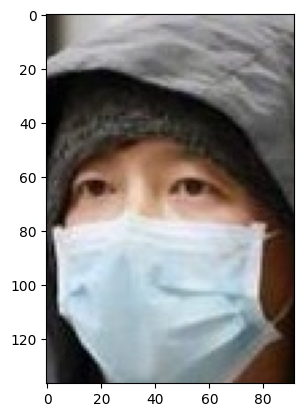

In [ ]:
#displaying the with mask image

image=mpimg.imread('/content/data/with_mask/with_mask_216.jpg')
img = plt.imshow(image)
plt.show()

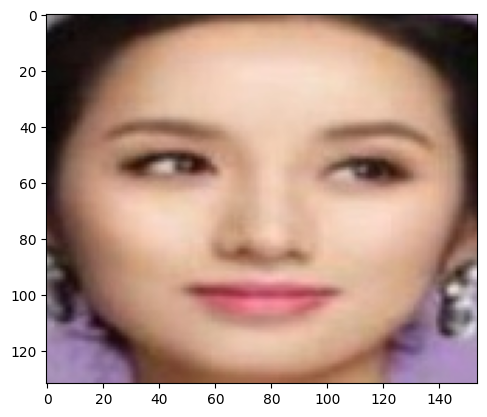

In [ ]:
#displaying the without mask image

image=mpimg.imread('/content/data/without_mask/without_mask_465.jpg')
img = plt.imshow(image)
plt.show()

Image Processing

1. resizing the image

2. converting to numpy array

In [ ]:
#convert image to numpy
with_mask_path = '/content/data/with_mask/'
data=[]
for i in with_mask_files:
  image=Image.open(with_mask_path + i)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#convert image to numpy for without mask
without_mask_path = '/content/data/without_mask/'
for i in without_mask_files:
  image=Image.open(without_mask_path + i)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
len(data)

7553

In [ ]:
# converting image to numpy and label as y

x=np.array(data)
y=np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(7553, 128, 128, 3)

In [ ]:
y.shape

(7553,)

splitting the data into training and testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

x_train_scale = x_train/255
x_test_scale=x_test/255

In [ ]:
type(x_train)

numpy.ndarray

# **Creating a Neural Network (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(no_of_classes, activation='sigmoid'))

In [ ]:
# compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(x_train_scale,y_train,validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 155s 894ms/step - loss: 0.7187 - acc: 0.5052 - val_loss: 0.6918 - val_acc: 0.4529
Epoch 2/5
170/170 [==============================] - 175s 1s/step - loss: 0.6691 - acc: 0.5755 - val_loss: 0.4533 - val_acc: 0.8727
Epoch 3/5
170/170 [==============================] - 137s 806ms/step - loss: 0.5364 - acc: 0.7791 - val_loss: 0.4627 - val_acc: 0.8281
Epoch 4/5
170/170 [==============================] - 139s 817ms/step - loss: 0.4633 - acc: 0.8201 - val_loss: 0.3641 - val_acc: 0.8628
Epoch 5/5
170/170 [==============================] - 138s 812ms/step - loss: 0.4291 - acc: 0.8387 - val_loss: 0.3426 - val_acc: 0.8529


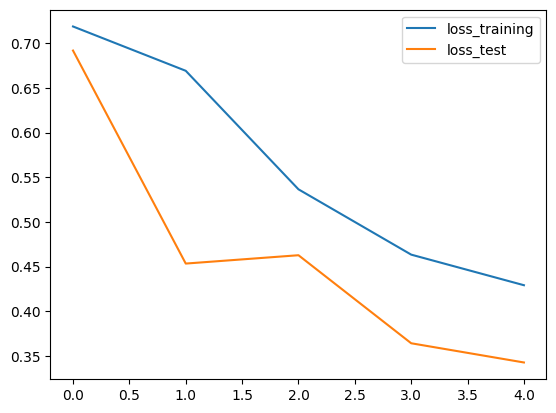

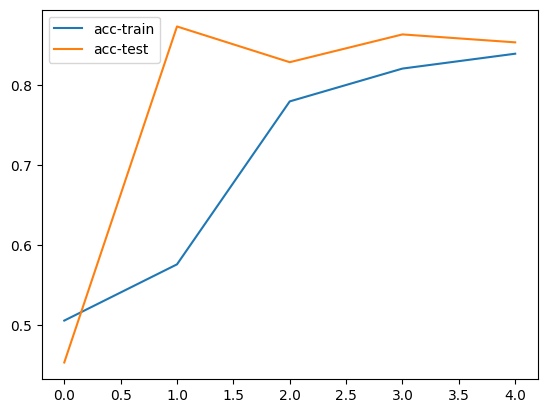

In [ ]:
# plotting the graph for loss and acc on train
h=history
plt.plot(h.history['loss'], label='loss_training')
plt.plot(h.history['val_loss'], label='loss_test')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='acc-train')
plt.plot(h.history['val_acc'], label='acc-test')
plt.legend()
plt.show()

Model Evaluate

In [ ]:
loss, val= model.evaluate(x_test_scale,y_test)
print('test_accuracy: ',val)

48/48 [==============================] - 17s 344ms/step - loss: 0.3639 - acc: 0.8564
test_accuracy:  0.8563864827156067


Predictive System

image path/content/png-clipart-black-african-american-graphy-man-man-photography-people-thumbnail.png


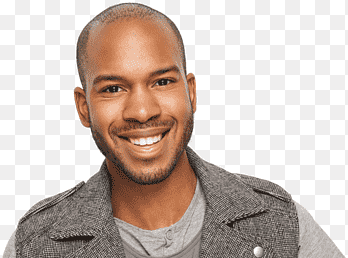

1/1 [==============================] - 0s 32ms/step
person is wearing mask


In [49]:
input_image_path = input('image path')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(128,128))
input_image_scale=input_image_resize/255
input_image_reshape = np.reshape(input_image_scale,[1,128,128,3])
input_pred = model.predict(input_image_reshape)
input_pred_label = np.argmax(input_pred)
if(input_pred_label==0):
  print('person is not wearing mask')
else:
  print('person is wearing mask')